In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
def getx(k, p):
    return np.sqrt(k/p)

def gety(k, p):
    return np.sqrt(k*p)

In [7]:
def getxr(k, pa, pb):
    return np.sqrt(k) * (np.power(pa*pb, -1/4) - np.power(pb, -1/2))

def getyr(k, pa, pb):
    return np.sqrt(k) * (np.power(pa*pb, 1/4) - np.power(pa, 1/2))

def capeff(k, pa, pb):
    return 1 / np.sqrt(getxr(k, pa, pb)*getyr(k, pa, pb) / k)

def capeff2(pa, pb):
    return 1 / (1-np.power(pa/pb, 1/4))

In [12]:
capeff(1, 1, 2), capeff2(1, 2)

(6.285213507883248, 6.285213507883244)

In [16]:
def getxrprime(k, pa, pb, pn):
    return np.sqrt(k) * (np.power(pn, -1/2) - np.power(pb, -1/2))

def getyrprime(k, pa, pb, pn):
    return np.sqrt(k) * (np.power(pn, 1/2) - np.power(pa, 1/2))

In [17]:
def getvh(k, pa, pb, pn):
    return pn*getxr(k, pa, pb) + getyr(k, pa, pb)

def getvp(k, pa, pb, pn):
    return pn*getxrprime(k, pa, pb, pn) + getyrprime(k, pa, pb, pn)

In [18]:
def getdivloss(k, pa, pb, pn):
    return getvp(k, pa, pb, pn) / getvh(k, pa, pb, pn)

In [38]:
pa = 9
pb = 1000
k = 10

pns = np.linspace(pa, pb, 100)
divlosses = [getdivloss(k, pa, pb, pn) for pn in pns]

In [40]:
print(np.sqrt(pa*pb))

94.86832980505137


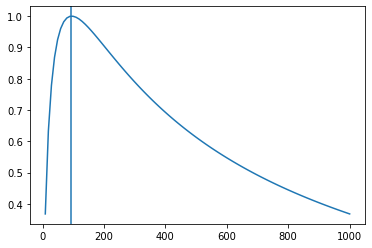

In [51]:
plt.plot(pns, divlosses)
plt.axvline(94)

In [49]:
getxrprime(k , pa, pb, 1000), getyrprime(k,pa,pb, 9)

(0.0, 0.0)

In [50]:
getyrprime(k , pa, pb, 1000), getxrprime(k,pa,pb, 9)

(90.51316701949486, 0.9540925533894599)

In [56]:
getx(k, pa) - getx(k, pb), gety(k, pb) - gety(k, pa),

(0.9540925533894599, 90.51316701949486)

In [261]:
def getytokens(k, pa, pb):
    return gety(k, pb) - gety(k, pa)

def getxtokens(k, pa, pb):
    return getx(k, pa) - getx(k, pb)

In [262]:
def v2divloss(pa, pb, pn):
    pm = np.sqrt(pa*pb)
    ratio = pn / pm
    return 2*np.sqrt(ratio) / (ratio + 1)

In [269]:
pa = 99
pb = 200
k = 10

pns = np.linspace(pa, pb, 100)
divlosses = [getdivloss(k, pa, pb, pn) for pn in pns]

In [270]:
pnsLess = np.linspace(pa-20, pa, 100)
pnsMore = np.linspace(pb, pb+20, 100)

In [271]:
xtokens = getxtokens(k, pa, pb)
ytokens = getytokens(k, pa, pb)

In [272]:
greaterLosses = [ytokens / getvh(k, pa, pb, pn) for pn in pnsMore]
lessLosses = [xtokens * pn / getvh(k, pa, pb, pn) for pn in pnsLess]

In [275]:
v2ps = np.linspace(pa-20, pb+20, 1000)
v2Losses = [v2divloss(pa, pb, pn) for pn in v2ps]

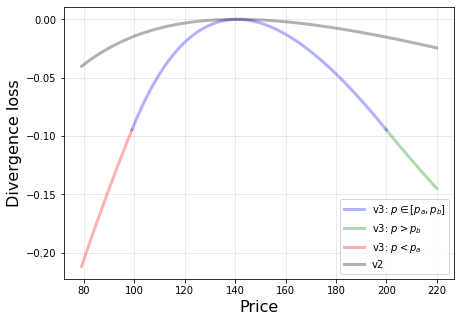

In [276]:
f, ax = plt.subplots(figsize=(7,5))
ax.plot(pns, np.array(divlosses)-1, linewidth=3, alpha=0.3, color='b', label=r'v3: $p \in [p_a, p_b]$')

ax.plot(pnsMore, np.array(greaterLosses)-1, linewidth=3, alpha=0.3, color='g', label=r'v3: $p > p_b$')
ax.plot(pnsLess, np.array(lessLosses)-1, linewidth=3, alpha=0.3, color='r', label=r'v3: $p < p_a$')

ax.plot(v2ps, np.array(v2Losses)-1, linewidth=3, alpha=0.3, color='k', label='v2')
ax.grid(alpha=0.3)

ax.legend()

ax.set_xlabel('Price', size=16)
ax.set_ylabel('Divergence loss', size=16)
plt.show()

# relative divergence loss

In [174]:
def getYEnd(pa, pb, pn):
    num = np.sqrt(pb) * np.power(pa*pb, 1/4) + np.sqrt(pa * pb)
    den = np.sqrt(pa*pb) + pn
    return num / den - 1

In [175]:
def v2divloss(pa, pb, pn):
    pm = np.sqrt(pa*pb)
    ratio = pn / pm
    return 2*np.sqrt(ratio) / (ratio + 1) - 1

In [165]:
1-divlosses[-1]

0.09463331598695113

In [167]:
getYEnd(pa, pb, pb), v2divloss(pa, pb, pb), getYEnd(pa, pb, pb) / v2divloss(pa, pb, pb)

(-0.0946333159869509, -0.015256192265048374, 6.202944636700332)

In [196]:
pa = 99
pb = 200
getYEnd(pa, pb, pb), v2divloss(pa, pb, pb), getYEnd(pa, pb, pb)/ v2divloss(pa, pb, pb)

(-0.0946333159869509, -0.015256192265048374, 6.202944636700332)

In [197]:
def getXEnd(pa, pb, pn):
    num = pn * (np.power(pb/pa,1/4) +1) 
    den = np.sqrt(pa*pb) + pn
    return num / den - 1

In [198]:
divlosses[0] - 1

-0.09463331598695113

In [199]:
getXEnd(pa, pb, pa), v2divloss(pa, pb, pa), getXEnd(pa, pb, pa) / v2divloss(pa, pb, pa)

(-0.09463331598695113, -0.015256192265048374, 6.202944636700347)

In [246]:
def getRelativeDivLoss(pa, pb):
    xend = getXEnd(pa, pb, pa)
    yend = getYEnd(pa, pb, pb)
    v2xend = v2divloss(pa, pb, pa)
    v2yend = v2divloss(pa, pb, pb)
#     return xend/v2xend, xend, v2xend
    return np.sqrt(xend/v2xend * yend/v2yend), xend, v2xend

In [240]:
def getCapEff(pa, pb):
    return 1 / (1-np.power(pa/pb, 1/4))

In [247]:
middle = 1000
windows = np.arange(1,100)
rel_div_loss = []
cap_effs = []
for i in windows:
    pa = middle - i
    pb = middle + i
    rel_div_loss.append(getRelativeDivLoss(pa, pb)[0])
    cap_effs.append(getCapEff(pa, pb))

In [248]:
getCapEff(99,101), getRelativeDivLoss(99, 101)

(200.49374983592855,
 (200.49374983644125, -0.002506312854711812, -1.2500703172824146e-05))

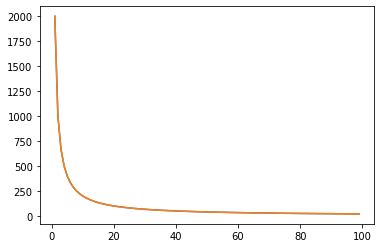

In [238]:
plt.plot(windows, rel_div_loss)
plt.plot(windows, cap_effs)

In [219]:
rel_div_loss[10], cap_effs[10]

(182.31130659930812, 182.31130659979883)

# formulas

In [291]:
def leftFormula(a, b, n):
    num = n * (np.power(b/a, 1/4) + 1)
    den = np.sqrt(a*b) + n
    return num / den - 1

def middleFormula(a, b, n):
    num = np.power(a, 1/4) * (np.sqrt(a*b) - 2 * np.sqrt(b*n)+n)
    den = (np.power(a,1/4) - np.power(b, 1/4)) * (np.sqrt(a * b) + n)
    return num / den - 1

def rightFormula(a, b, n):
    num = np.sqrt(b) * np.power(a*b, 1/4) + np.sqrt(a*b)
    den = np.sqrt(a*b) + n
    return num / den - 1

In [292]:
lefts = [leftFormula(pa, pb, pn) for pn in pnsLess]
middles = [middleFormula(pa, pb, pn) for pn in pns]
rights = [rightFormula(pa, pb, pn) for pn in pnsMore]

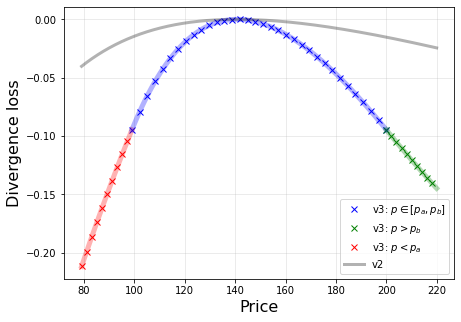

In [295]:
f, ax = plt.subplots(figsize=(7,5))
ax.plot(pns[::3], np.array(divlosses)[::3]-1, 'x', color='b', label=r'v3: $p \in [p_a, p_b]$')

ax.plot(pnsMore[::10], np.array(greaterLosses)[::10]-1, 'x', color='g', label=r'v3: $p > p_b$')

ax.plot(pnsLess[::10], np.array(lessLosses)[::10]-1, 'x', color='r', label=r'v3: $p < p_a$')

ax.plot(pnsLess, lefts, linewidth=5, alpha=0.3, color='r')
ax.plot(pns, middles, linewidth=5, alpha=0.3, color='b')
ax.plot(pnsMore, rights, linewidth=5, alpha=0.3, color='g')


ax.plot(v2ps, np.array(v2Losses)-1, linewidth=3, alpha=0.3, color='k', label='v2')
ax.grid(alpha=0.3)

ax.legend()

ax.set_xlabel('Price', size=16)
ax.set_ylabel('Divergence loss', size=16)
plt.show()

In [302]:
def fun(a, b):
    return 1 / (1- np.power(a/b, 1/4))

In [304]:
fun(100, 200), fun(1100, 1200)

(6.285213507883244, 46.47281258952057)

In [305]:
def fun1(a,b,n):
    num = 2 * np.sqrt(n / np.sqrt(a * b))
    den = n / np.sqrt(a * b) + 1
    return num / den